## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [52]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [53]:
#read in the ab_data.csv file
df= pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [54]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [55]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [56]:
#create new df's to simplify information retrieval
df_treat=df.query('group == "treatment"')
df_con=df.query('group == "control"')

In [57]:
# the question is asking us to find the amount of times that neither
# new_page and treatment show up together

# in the df 'to' we have treatment but not new_page so we keep
to=df_treat.query('landing_page == "old_page"').landing_page
# in the df 'tn' we have treatment and new_page so we ignore
tn=df_treat.query('landing_page == "new_page"').landing_page
# in the df 'co' we have control and old_page but neither treatment or new_page so we ignore
co=df_con.query('landing_page == "old_page"').landing_page
# in the df 'cn' we have control and new_page so we keep
cn=df_con.query('landing_page == "new_page"').landing_page

to.count()+cn.count()

3893

f. Do any of the rows have missing values?

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [59]:
df_to=df.query('group =="treatment" and landing_page == "new_page"')#supposed to be df_tn
df_cn=df.query('group == "control" and landing_page == "old_page"')#supposed to be df_co
df2 = pd.concat([df_to,df_cn])


In [10]:
df2.shape

(290585, 5)

In [60]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [62]:
df2_uniq=df2.user_id.nunique()
print('There are {} user_ids'.format(df2_uniq))

There are 290584 user_ids


b. There is one **user_id** repeated in **df2**.  What is it?

In [74]:
df2[df2.duplicated('user_id')] #user_id 773192

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [75]:
df2[df2.duplicated('user_id')].index #row 2993

Int64Index([2893], dtype='int64')

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [76]:
#Drops the duplicate user_id
df2.drop_duplicates(subset='user_id', inplace=True)


In [77]:
df2[df2['user_id']==773192] #a check to make sure only one instance shows up


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [78]:
df2.shape

(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [82]:
df2.converted.mean()
print('The conversion probability is {0:.4f}'.format(df2.converted.mean()))

The conversion probability is 0.1196


b. Given that an individual was in the `control` group, what is the probability they converted?

In [83]:
df2[df2['group']=='control'].converted.mean()
print('The conversion probability is {0:.4f}'.format(df2[df2['group']=='control'].converted.mean()))

The conversion probability is 0.1204


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [84]:
df2[df2['group']=='treatment'].converted.mean()
print('The conversion probability is {0:.4f}'.format(df2[df2['group']=='treatment'].converted.mean()))

The conversion probability is 0.1188


d. What is the probability that an individual received the new page?

In [86]:
(df2['landing_page']=='new_page').mean()
print('The probability of an individual receiving a new page is {0:.4f}'.format((df2['landing_page']=='new_page').mean()))

The probability of an individual receiving a new page is 0.5001


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Going by the information presented above I say that there is not enough evidence to show that one page leads to more conversions. Both pages in my opinion are currently neck and neck and more data and test are required to provide a more accurate answer. We can see above that only 12% in the control group converted and only 11% in the treatment group converted; also it should be noted that a user has a 50% probability of receiving a new page.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

 $H{o}$= $p_{old}$ ≤ $p_{new}$  
 $H{1}$= $p_{old}$ > $p_{new}$  

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [87]:
#retrieves the convert rate for p_new
p_new=df2[df2['landing_page']=='new_page']['converted'].mean()

print(('The convert rate for p_new is:{0:.4f}').format(p_new))

The convert rate for p_new is:0.1188


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [88]:
#retrieves the convert rate for p_old
p_old=df2[df2['landing_page']=='old_page']['converted'].mean()
print(('The convert rate for p_old is:{0:.4f}').format(p_old))

The convert rate for p_old is:0.1204


In [89]:
#grab the mean of both p_new and p_old for p_old = p_new under the null
p_mean = np.mean([p_new, p_old])
print(('The mean between p_new and p_old is:{0:.4f}').format(p_mean))

The mean between p_new and p_old is:0.1196


c. What is $n_{new}$?

In [90]:
#queries the landing page for a count of 'new_page' and 'n' is the number of occurences
n_new = df2.query('landing_page == "new_page"').landing_page.count()
print('n_new is {}'.format(n_new))

n_new is 145310


d. What is $n_{old}$?

In [91]:
#subtracts the count of n_new from the total amount of rows for n_old
n_old = df2.shape[0]-n_new
print('n_old is {}'.format(n_old))

n_old is 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [92]:
new_page_converted= np.random.choice([1,0],size=n_new, p=[p_mean,1-p_mean])
new_page_converted.mean()

0.118959465969307

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [93]:
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_mean, (1-p_mean)])
old_page_converted.mean()

0.11953274501975578

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [94]:
#grab the difference between the p_new and p_old
p_diff = new_page_converted.mean()-old_page_converted.mean()
print(('The difference of p_new and p_old is:{0:.8f}').format(p_diff))

The difference of p_new and p_old is:-0.00057328


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [95]:
p_diffs=[]
for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_mean, (1-p_mean)])
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_mean, (1-p_mean)])
    p_diff = new_page_converted.mean()-old_page_converted.mean()
    p_diffs.append(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

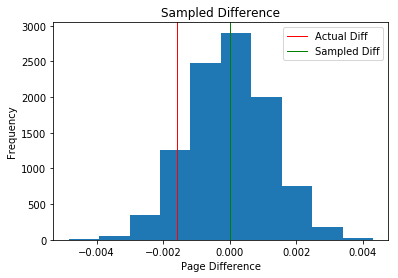

In [102]:
plt.hist(p_diffs);
plt.title('Sampled Difference')
plt.xlabel('Page Difference')
plt.ylabel('Frequency')
plt.axvline(x=(p_new-p_old), color='r', linewidth=1, label="Actual Diff")
plt.axvline(x=(np.array(p_diffs).mean()), color='g', linewidth=1, label="Sampled Diff")
plt.legend()
plt.show()

In [32]:
p_diffs_ar=np.array(p_diffs)
p_diffs_ar

array([ -6.14742326e-04,   1.00269103e-03,   8.24167396e-04, ...,
        -1.32858419e-04,  -6.00586413e-04,   6.67200229e-05])

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [108]:
(p_diffs_ar > p_diff).mean()
print('The porportion of p_diffs that are greater than the actual obs_dif in ab_data.csv is {0:.4f}'.format((p_diffs_ar > p_diff).mean()))

The porportion of p_diffs that are greater than the actual obs_dif in ab_data.csv is 0.2518


k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?


**Here we are trying to find the porportion in p-values between the actual differences versus the sampled differences. The value shown shows us that only 25.18% of the sampled p-value difference was greater than the -0.00057 actual difference between the new and old pages. That means 74.82% was less than the actual calculated difference. There does not seem to be a significant amount of data showing that one version is better than another.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [109]:
import statsmodels.api as sm

convert_old = sum(old_page_converted)
convert_new = sum(new_page_converted)
n_old =len(old_page_converted) 
n_new = len(new_page_converted)

convert_old, convert_new, n_old, n_new

(17392, 17511, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [110]:
# Find z-score and p-value
z_score, p_value = sm.stats.proportions_ztest(count=[convert_new, convert_old], 
                                              nobs=[n_new, n_old])
z_score, p_value

(0.65437618347506155, 0.51286947460372412)

In [111]:
from scipy.stats import norm

print(norm.cdf(z_score))
# Tells us how significant our z-score is

print(norm.ppf(1-(0.05)))# single-sides test with 95% CI
# Tells us what our critical value at 95% confidence is 
# Here, we take the 95% values as specified in PartII.1

0.743565262698
1.64485362695


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Since the z-score 0.744 is less than the critical value 1.645, we fail to reject the null hypothesis. We have a clearer understanding and see that the old and new pages are pretty similar. This section seems to agree with what we found in section j. and k. **

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**I believe a Logistical Regression test would be the right one to use.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [112]:
df2['intercept'] =1
df2[['control', 'ab_page']]=pd.get_dummies(df2['group'])
#df2.drop(labels=['control'], axis=1, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [113]:
import statsmodels.api as sm

logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [114]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 19 Dec 2018   Pseudo R-squ.:               8.077e-06
Time:                        01:25:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [115]:
np.exp(-0.0150)

0.98511193960306265

In [116]:
1/np.exp(-0.0150)

1.0151130646157189

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?


**The p-value associated with ab_page is 0.190. The p-value we found in Part II was based on a one-tailed test while the p-value we received with logistical regression is based on a two-tailed test.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?


**Considering additional factors can have a positive and/or negative results when performing a regression model test. Some inputs will give you better correlation results, but when you add more data you sometimes finds that it flips the outcome and returns an unexpective negative result.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [117]:
#Read in Countries csv
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [118]:
df_countries.shape

(290584, 2)

In [119]:
df_countries.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [120]:
df3 = df_countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df3.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [121]:
df3[['CA','UK','US']]= pd.get_dummies(df3['country'])
#df3.drop(['US'], axis=1, inplace=True)

In [122]:
df3.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [125]:
logit_mod = sm.Logit(df3['converted'], df3[['intercept', 'CA', 'UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 19 Dec 2018   Pseudo R-squ.:               1.521e-05
Time:                        01:27:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!



## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [126]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0